In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os

c:\users\admin\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\admin\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\admin\.conda\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\admin\.conda\envs\tensorflow1\lib\site-packages\tensorf

Now lets setup data directory, this directory is not uploaded on my github but the link is given 
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip , also intializing some variable

In [2]:
Train_data_dir = '.\\Dataset\\Dogs_vs_cats\\cats_and_dogs_filtered\\train'
Validation_data_dir = '.\\Dataset\\Dogs_vs_cats\\cats_and_dogs_filtered\\validation'
weights_dir = "D:\\Ml_course\\weights\\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5" 

batch_size = 128

In [3]:
#now lets count training and testing data size

train_size = len( os.listdir( os.path.join( Train_data_dir, 'dogs') )) + len( os.listdir((os.path.join( Train_data_dir, 'cats'))))
validation_size = len( os.listdir( os.path.join( Validation_data_dir, 'dogs') )) + len( os.listdir((os.path.join( Validation_data_dir, 'cats'))))
print(train_size, validation_size )

2000 1000


In [4]:
pretrain_model = InceptionV3( 
    input_shape = (140,140,3),
    include_top = False,
    weights = None
)
pretrain_model.load_weights(weights_dir)

In [5]:
for layer in pretrain_model.layers:
    layer.trainable = False
    
last_layer = pretrain_model.get_layer('mixed7')
last_output = last_layer.output

Now lets create the model which i will train

In [6]:
x = layers.Flatten()(last_output)
x = layers.Dense( 512, activation = 'relu')(x)
x = layers.Dense( 256, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

In [7]:
model = tf.keras.Model( pretrain_model.input, x)

In [19]:
#model.summary()

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile( 
    optimizer = RMSprop(lr=0.0002),
    loss = 'binary_crossentropy',
    metrics = ['acc']
             )

Now lets create the imagegenerator

In [10]:
training_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range= 45,
    horizontal_flip= True,
    shear_range= 0.3,
    fill_mode= 'nearest'
)

validate_gen = ImageDataGenerator( 
    rescale = 1/255,
    horizontal_flip= True,
    rotation_range= 45,
    fill_mode= 'nearest'
    
)

In [11]:
training_data = training_gen.flow_from_directory(
    Train_data_dir,
    target_size = (140,140),
    batch_size= batch_size,
    class_mode = 'binary'
)

validation_data = validate_gen.flow_from_directory(
    Validation_data_dir,
    target_size= (140,140),
    batch_size= batch_size,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    training_data,
    steps_per_epoch= train_size // batch_size,
    validation_data= validation_data,
    validation_steps= validation_size // batch_size,
    epochs = 20
)

Epoch 1/20
15/15 [==============================] - 43s 3s/step - loss: 0.7831 - acc: 0.6674 - val_loss: 0.4204 - val_acc: 0.8203
Epoch 2/20
15/15 [==============================] - 36s 2s/step - loss: 0.4433 - acc: 0.7863 - val_loss: 0.4242 - val_acc: 0.8560
Epoch 3/20
15/15 [==============================] - 26s 2s/step - loss: 0.3605 - acc: 0.8258 - val_loss: 1.3686 - val_acc: 0.7087
Epoch 4/20
15/15 [==============================] - 21s 1s/step - loss: 0.3232 - acc: 0.8587 - val_loss: 0.4939 - val_acc: 0.8817
Epoch 5/20
15/15 [==============================] - 21s 1s/step - loss: 0.3276 - acc: 0.8623 - val_loss: 0.2995 - val_acc: 0.9129
Epoch 6/20
15/15 [==============================] - 21s 1s/step - loss: 0.2561 - acc: 0.8839 - val_loss: 0.2782 - val_acc: 0.9208
Epoch 7/20
15/15 [==============================] - 21s 1s/step - loss: 0.2438 - acc: 0.8887 - val_loss: 1.8633 - val_acc: 0.7154
Epoch 8/20
15/15 [==============================] - 21s 1s/step - loss: 0.2376 - acc: 0.90

time to plot some curves

In [13]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(train_acc))

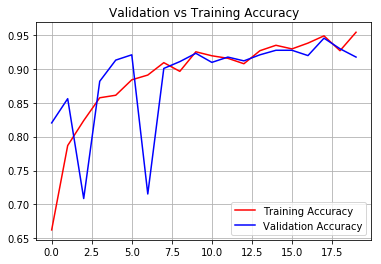

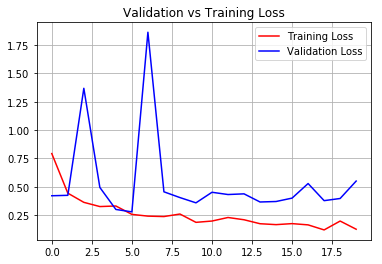

In [14]:
plt.plot( epochs, train_acc, 'r', label = 'Training Accuracy')
plt.plot( epochs, validation_acc, 'b', label = 'Validation Accuracy')
plt.legend(loc = 'best')
plt.grid()
plt.title("Validation vs Training Accuracy")
plt.figure()
plt.plot( epochs, train_loss, 'r', label = 'Training Loss')
plt.plot( epochs, validation_loss, 'b', label = 'Validation Loss')
plt.legend(loc = 'best')
plt.grid()
plt.title("Validation vs Training Loss")
plt.show()

# These are pretty good result one must admit that

Now time for testing

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
testing_path = 'D:\\Ml_course\\Dataset\\Dogs_vs_cats\\Testing\\'

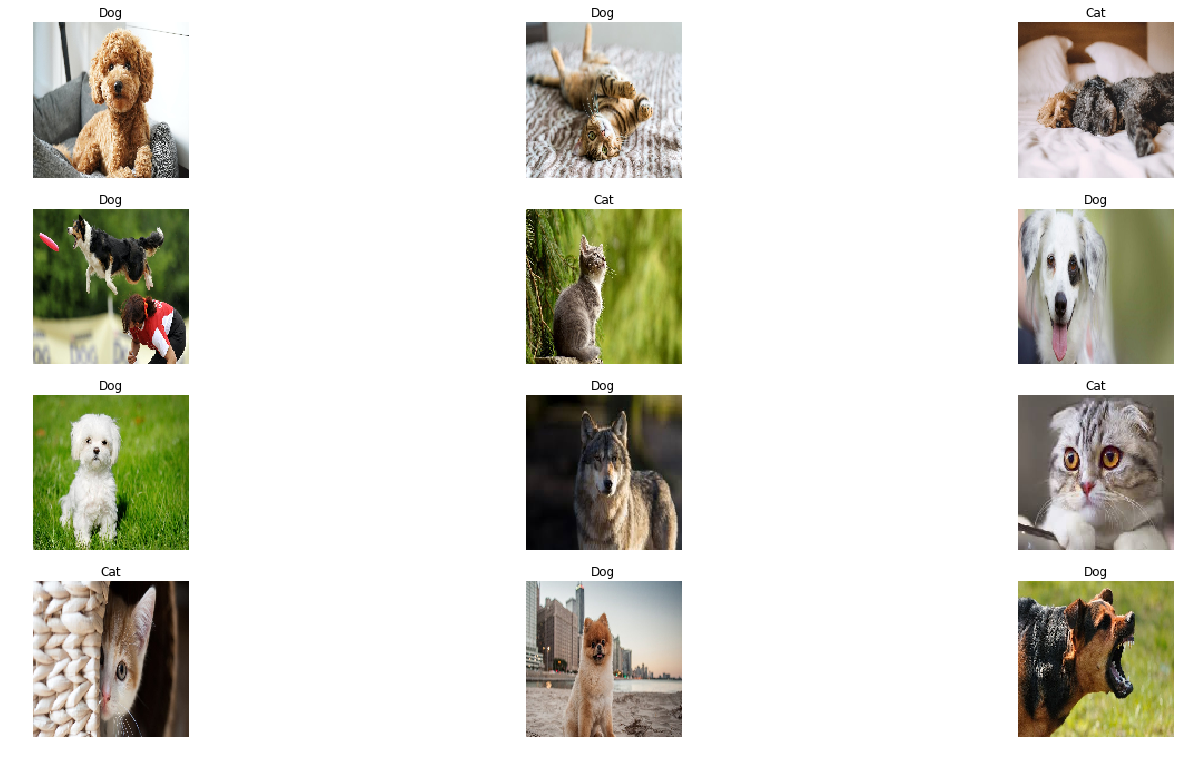

In [18]:
images = os.listdir( testing_path)
number_of_files = len(images)
fig=plt.figure(figsize=(25, 20))
columns = 3
rows = 6
i = 1
for test_image in images:
    fig.add_subplot(rows, columns, i)
    img = image.load_img(os.path.join(testing_path, test_image), target_size=(140, 140))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x]) /255
    classes = model.predict(images, batch_size=10)
    plt.imshow(img)
    plt.axis('off')
    if classes[0] < 0.5 :
        plt.title('Cat')
    else:
        plt.title('Dog')
    i += 1
    

plt.show()
        

# while running this notebook without any dropout dogs are also getting classified as cats when their ears are up so lets see what dropout can affect on this effect

I did't observe any effect on the model using droupout will try tommorow to increase it's accuracy